# TP 7 - Procesamiento de Imagenes
Grupo 4 <br>
Integrantes:
- Pablo Smolkin
- Pedro Carranza Vélez
- Philippe Dutriez Diaz
- Francisco Daniel Ledesma

Nota: Las funciones utilizadas se encuentran en el archivo functions.py

In [37]:
from sys import path
from os.path import realpath
path.append(realpath("../")) # Makes it works everywhere
from common.functions import *
import cv2

In [38]:
from functions import *

In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


***
## 1 - Aplicar la operación de dilación a la imagen de la izquierda siendo el elemento estructural:
#### B = [0, 1, 0; 1, 1, 1; 0, 1, 0]
(Broken_Text.tif)

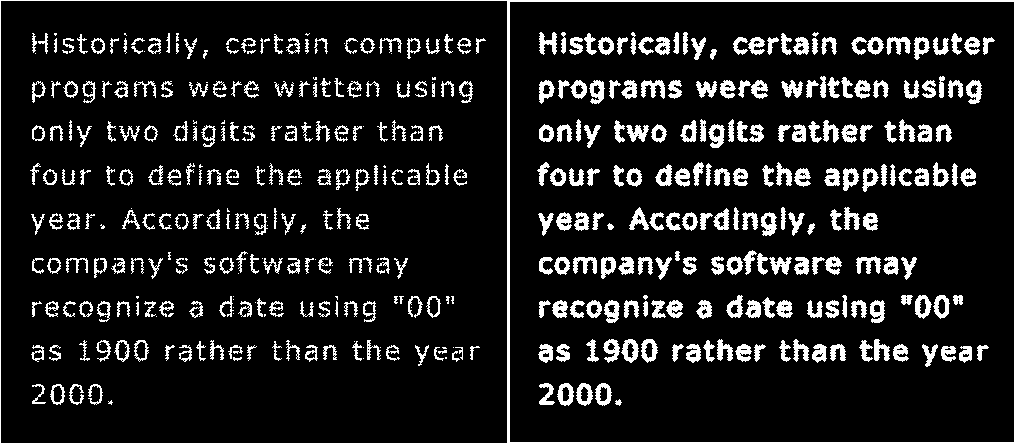

In [40]:
# Reading the input image
text = cv2.imread("img/Broken_Text.tif")
 
kernel = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]], dtype=np.uint8)
 
text_dilation = cv2.dilate(text, kernel, iterations=1)
 
h, w = text.shape[:2]
comparison = np.concatenate([text, text_dilation], axis=1)

displayImage_fromcv2(comparison, 2*w, h)

***
## 2 - Reproducir el siguiente ejemplo
![](img/2.png)


Levantamos la imagen

In [41]:
noisy_sqares = cv2.imread("img/Noisy_Squares.tif")

## Erosion con elemento cuadrado de 13px de lado

In [42]:
kernel = np.ones((13, 13), np.uint8)
erode_squares = cv2.erode(noisy_sqares, kernel) 

## Dilatacion con elemento cuadrado de 13px de lado

In [43]:
kernel = np.ones((13, 13), np.uint8)
dilate_squares = cv2.dilate(erode_squares, kernel) 

### Resultado

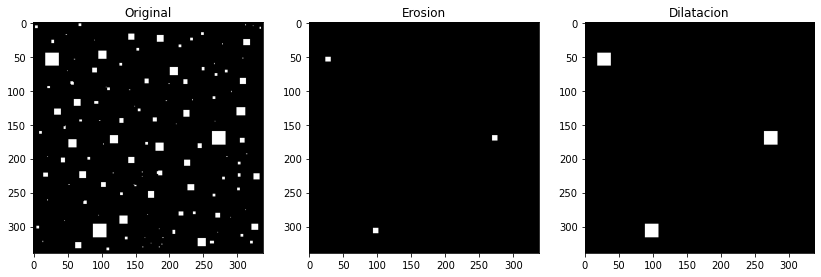

In [44]:
images = {'Original':noisy_sqares,
          'Erosion':erode_squares,
          'Dilatacion':dilate_squares
        }
compare(images)


***
## 3 - Aplicar la operación de apertura a la figura (b) con el elemento estructural (a) el radio del elemento estructural debe ser variable de manera que el usuario pueda interactuar desde el programa
![](img/3.png)

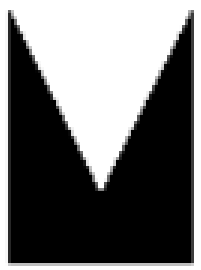

In [45]:
figb = cv2.imread("img/fig3.png")
h, w = figb.shape[:2]
displayImage_fromcv2(figb, w, h)

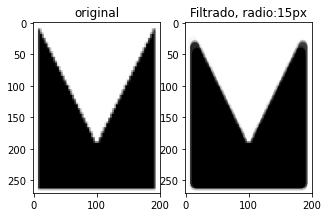

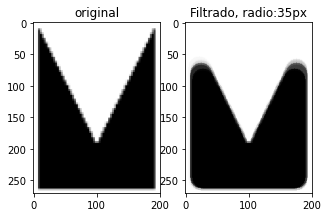

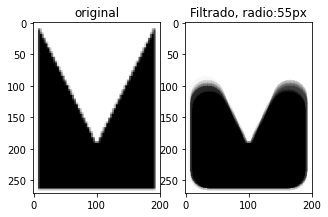

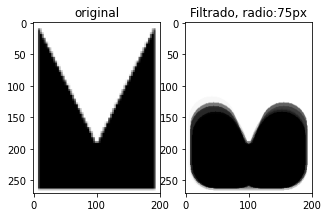

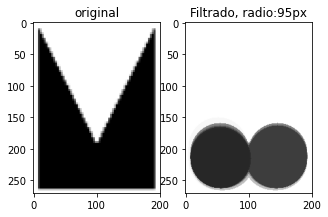

In [59]:
radius = [15,35,55,75,95]
for rad in radius:
  kernel = circular_kernel(rad)
  inverted_figb = cv2.bitwise_not(figb)
  inverted_opening = cv2.morphologyEx(inverted_figb, cv2.MORPH_OPEN, kernel)
  opening = cv2.bitwise_not(inverted_opening)
  images = {'original':figb,
            'Filtrado, radio:'+str(rad)+'px':opening
          }
  compare(images,size=(5,5))

***
## 4 - Extraer el contorno de la figura izquierda
![](img/4.png)

Levantamos la imagen

In [ ]:
lincoln = cv2.imread("img/Lincoln from penny.tif")

Erosionamos con un kernel cuadrado donde el tamaño de la matriz definira el ancho de la linea de contorno.<br>
Finalmente obtenemos el contorno restando el resultado con la imagen original

In [ ]:
kernel = np.ones((4, 4), np.uint8)
lincoln_eroded = cv2.erode(lincoln, kernel) 
lincoln_outline =  lincoln - lincoln_eroded

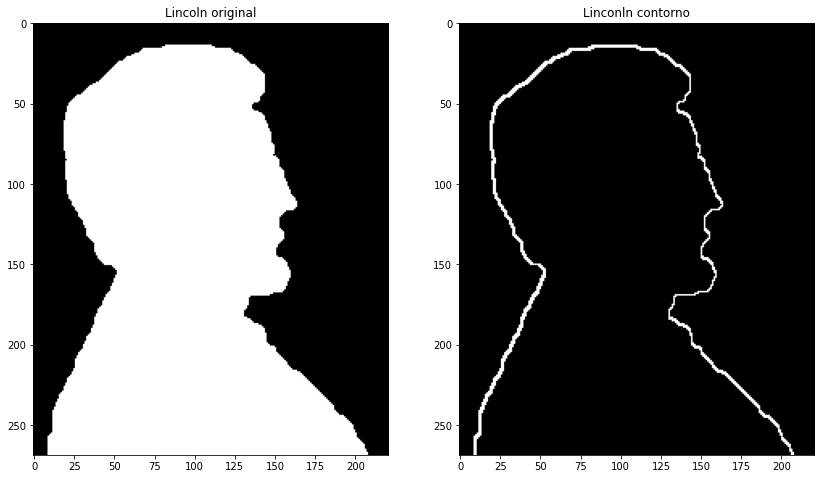

In [ ]:
images = {'Lincoln original':lincoln,
          'Linconln contorno':lincoln_outline
        }
compare(images)

***
## 5 - Investigar qué es (y dar ejemplos) de:
#### Thinning

#### Thickening

#### Top-hat transform

#### Hit and miss